# DEEP LEARNING MID EXAM No 1

[LO 1, LO 2, LO 3 & LO 4, 40%] Charlie merupakan salah satu data scientist di sebuah bank terbesar di Indonesia. Dia diminta untuk membuat sebuah aplikasi yang membantu perusahaan untuk menentukan apakah sebuah pengajuan pinjaman (loan) yang dilakukan seseorang adalah dapat diterima atau ditolak (binary classification).

Tim data memberikan dataset yang dapat diunduh di:
https://tinyurl.com/UTSDeepLearning2024No1


Dalam dataset tersebut terdapat informasi penting mengenai keterangan setiap kolomnya. Buatlah arsitektur Back Propagation Neural Network (BPNN).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Deep Learning UTS/No1/Bank_Loan_Granting.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.3384,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.7742,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.00,2.0,3.00,4.0
Education,5000.0,1.8810,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.00,0.0,0.00,1.0


In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# a) Preprocessing

[LO 3, LO 4, 5 poin] Dataset yang diberikan memiliki beberapa problem, lakukan praproses data untuk menyelesaikan problem dari data tersebut. Sebutkan problem apa saja yang kalian temukan dari data yang diberikan, berikan penjelasan mengenai pendekatan apa yang kalian gunakan dan kenapa memilih pendekatan yang dipilih?

## Check Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


dapat dilihat bahwa tidak ada missing value dalam data yang diberikan

## Check Duplicate

In [ ]:
df.duplicated().sum()

0

Dapat dilihat bahwa tidak ada duplicate dalam dataset yang diberikan

## Drop Column

Dapat dilihat dari section check unique value di atas bahwa column ID hanya berupa increment yang menanadakan urutan baris. Oleh karena itu, saya drop kolom tersebut karena menurut saya tidak akan berpengaruh pada prediction nanti.

In [ ]:
df.drop(columns=['ID'], inplace=True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


## Change Data Type

Pada section check unique value di atas dapat dilihat juga bahwa ada kesalahan data type untuk kolom CCAvg atau bisa juga merupakan feature yang dapat di konversi atau dapat di process menjadi suatu insight numerik.

Selain itu, terdapat kasus di mana penyebut dari pecahan CCAvg tersebut adalah 0. Oleh karena itu, kasus tersebut akan saya anggap sebagai missing value dan saya impute dengan mean atau median tergantung distribusinya nanti.

In [ ]:
def convert_to_float(value):
  outlier = [] # untuk lihat ada berapa nan value/value yg penyebutnya 0
  numerator, denominator = value.split("/")
  numerator = float(numerator)
  denominator = float(denominator)
  if denominator == 0:
    # print(value)
    return np.nan
  else:
    return numerator / denominator


In [ ]:
df['CCAvg_float'] = df['CCAvg'].apply(convert_to_float)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_float
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0,0.016667
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0,0.020000
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0,NaN
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0,0.028571
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1/90,3,0,0,0,0,1,0,0.011111
4996,30,4,15,92037,4,0/40,1,85,0,0,0,1,0,0.000000
4997,63,39,24,93023,2,0/30,3,0,0,0,0,0,0,0.000000
4998,65,40,49,90034,3,0/50,2,0,0,0,0,1,0,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   object 
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  CCAvg_float         4314 non-null   float64
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [ ]:
df.isna().sum()

Age                     0
Experience              0
Income                  0
ZIP Code                0
Family                  0
CCAvg                   0
Education               0
Mortgage                0
Personal Loan           0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
CCAvg_float           686
dtype: int64

Ternyata terdapat 686 kasus di mana penyebut dari pecahan CCAvg tersebut adalah 0.

<Axes: >

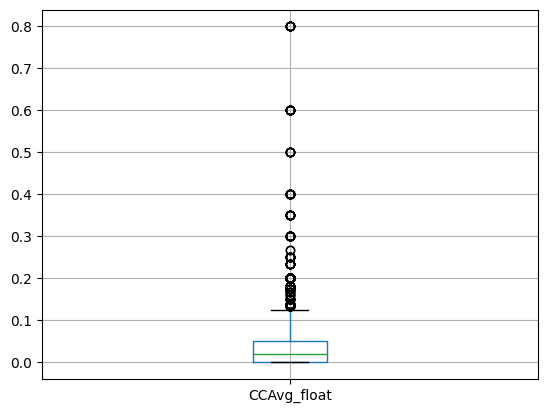

In [ ]:
df.boxplot(column=['CCAvg_float'])

Dapat dilihat dari boxplot di atas untuk variabel CCAvg_float, bahwa distribusinya skewed dan bukan normal distribution. Oleh karena itu, value NA tadi akan di impute dengan median.

### Impute CCAvg with median

In [ ]:
median = df['CCAvg_float'].median()

df['CCAvg_float'].fillna(median, inplace=True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_float
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0,0.016667
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0,0.020000
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0,0.020000
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0,0.028571
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1/90,3,0,0,0,0,1,0,0.011111
4996,30,4,15,92037,4,0/40,1,85,0,0,0,1,0,0.000000
4997,63,39,24,93023,2,0/30,3,0,0,0,0,0,0,0.000000
4998,65,40,49,90034,3,0/50,2,0,0,0,0,1,0,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   object 
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  CCAvg_float         5000 non-null   float64
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.00,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.00,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.00,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.00,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.00,3.00,4.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.00,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.00,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.00,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.00,0.00,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.00,0.00,1.0


# b) EDA

[LO 3, LO 4, 5 poin] Lakukan eksplorasi data terlebih dahulu untuk memahami permasalahan yang dihadapi terlebih dahulu. Selanjutnya pisahkan dataset menjadi train, test dan validation set dengan ketentuan (80 train, 10 val, 10 test)

## Check Outlier

<Axes: >

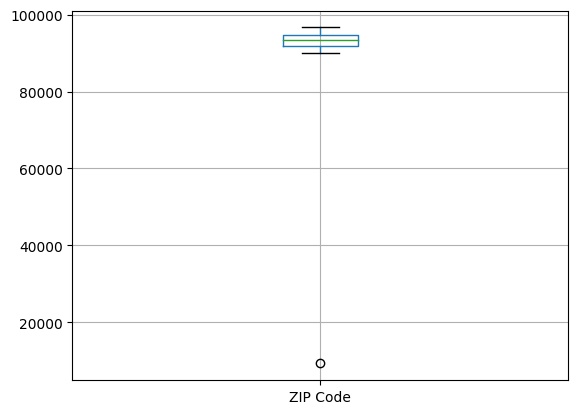

In [ ]:
df.boxplot(column=['ZIP Code'])

<Axes: >

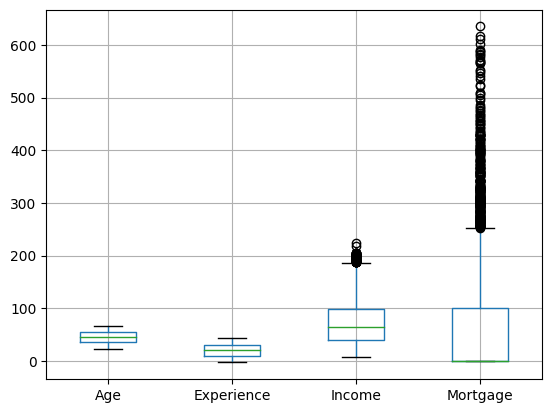

In [ ]:
df.boxplot(column=['Age', 'Experience', 'Income', 'Mortgage'])

<Axes: >

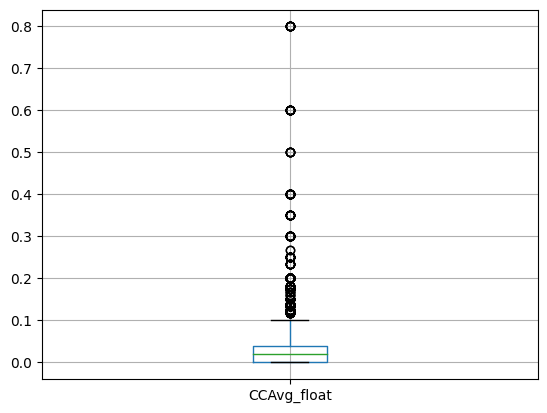

In [ ]:
df.boxplot(column=['CCAvg_float'])

In [ ]:
cont = ['Age', 'Experience', 'Income', 'Mortgage', 'ZIP Code', 'CCAvg_float']

for col in cont:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(col)
    # Print outliers if any
    if len(outliers) > 0:
        print(f"\tPotential outliers: ", len(outliers), " rows")
    else:
        print(f"\tNo potential outlier detected")


Age
	No potential outlier detected
Experience
	No potential outlier detected
Income
	Potential outliers:  96  rows
Mortgage
	Potential outliers:  291  rows
ZIP Code
	Potential outliers:  1  rows
CCAvg_float
	Potential outliers:  399  rows


Dapat dilihat bahwa ada beberapa kolom yang memiliki outlier, namun, semuanya tidak lebih dari 10% dari data. Oleh karena itu, nantinya akan dihandle dengan robust scaler.

## Check Unique Value

In [ ]:
cat = ['ZIP Code', 'Family', 'CCAvg',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Personal Loan']

for col in cat:
  print('------' + col.upper() + '------')
  print(df[col].value_counts())
  print()

------ZIP CODE------
ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: count, Length: 467, dtype: int64

------FAMILY------
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

------CCAVG------
CCAvg
0/30    241
1/00    231
0/20    204
2/00    188
0/80    187
       ... 
3/25      1
3/67      1
4/67      1
8/90      1
2/75      1
Name: count, Length: 108, dtype: int64

------EDUCATION------
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

------SECURITIES ACCOUNT------
Securities Account
0    4478
1     522
Name: count, dtype: int64

------CD ACCOUNT------
CD Account
0    4698
1     302
Name: count, dtype: int64

------ONLINE------
Online
1    2984
0    2016
Name: count, dtype: int64

------CREDITCARD------
CreditCard
0    3530
1    1470
Name: count, dtype: int64

------PERSONAL LOAN------
Personal Loan
0    4520
1     480
Name: count, dtyp

## Corr Plot

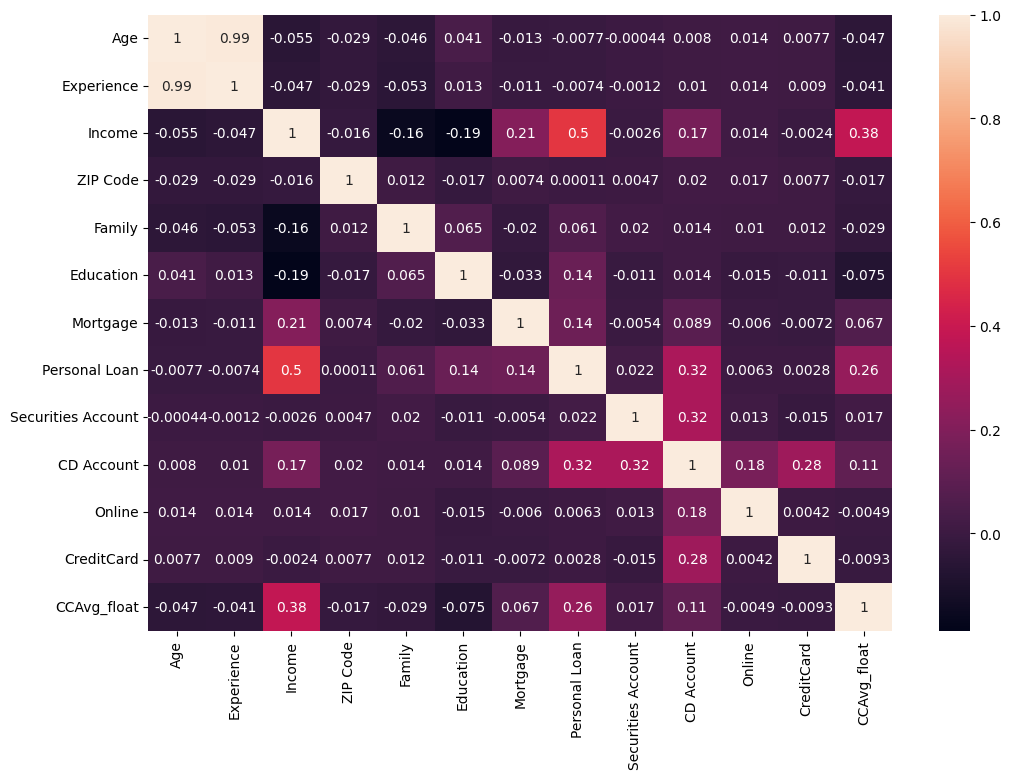

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True)
plt.show()

Dapat dilihat dari chart heatmap correlation di atas, bahwa tidak ada korealasi yang kuat antara features terhadap **Personal Loans**. Namun, kita dapat mengetahui bahwa **Age** dan **Experience** sangat berkorelasi antara 1 dan yang lainnya. Dapat disimpulkan bahwa korelasi antar keduanya merupakan strong positive correlation, yang mana artinya semakin tinggi usia seseorang, semakin lama pula Experiencenya

## Histogram and Bar Plot

In [ ]:
cont = ['Age', 'Experience', 'Income', 'Mortgage', 'ZIP Code', 'CCAvg_float']
cat = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']

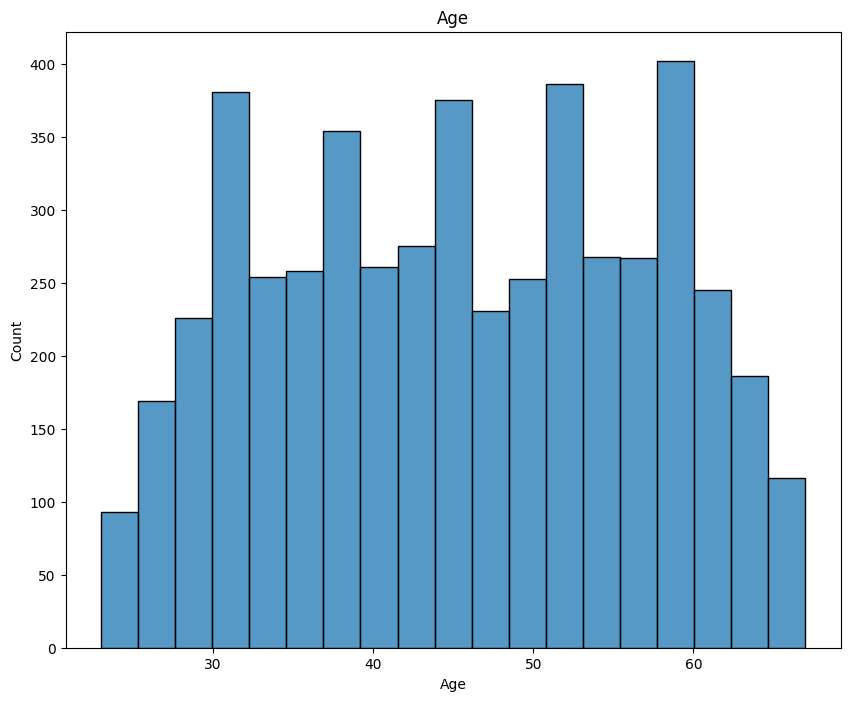

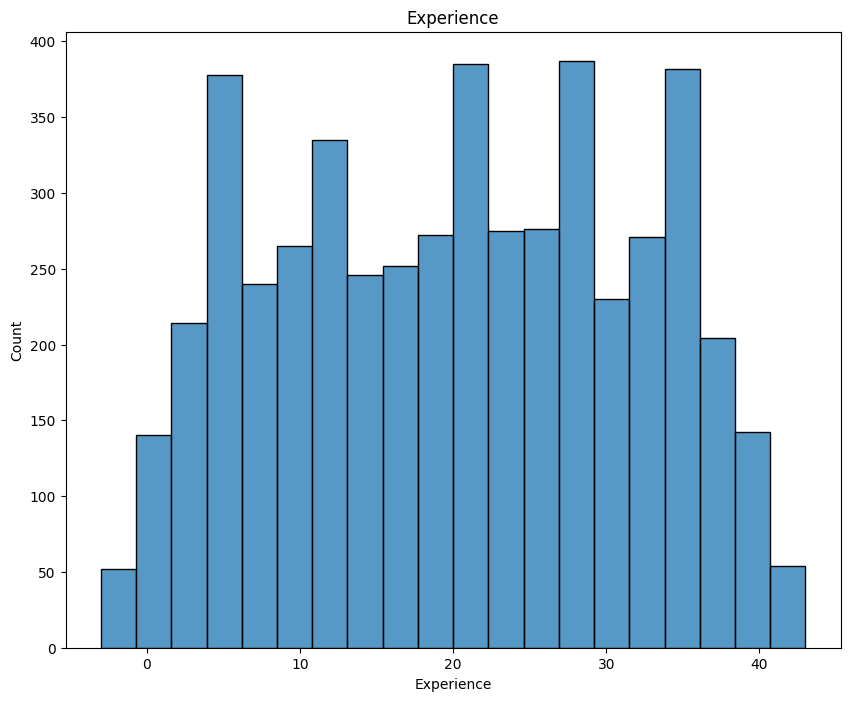

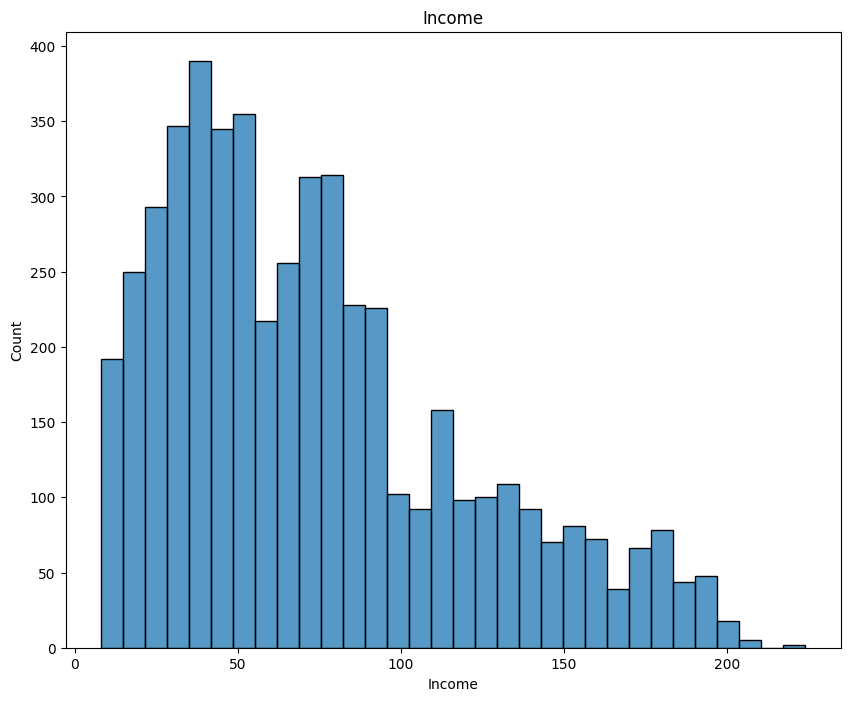

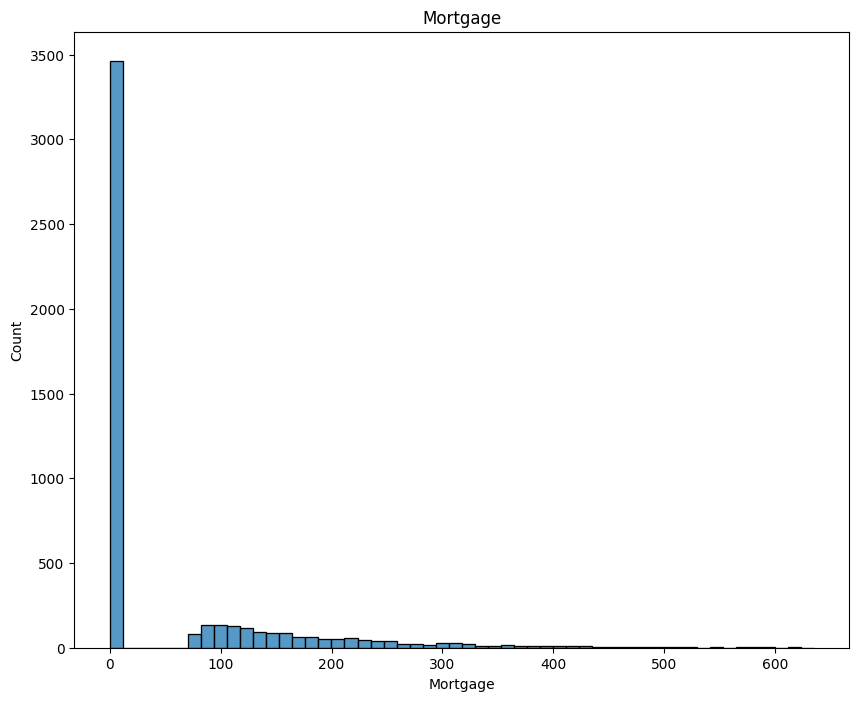

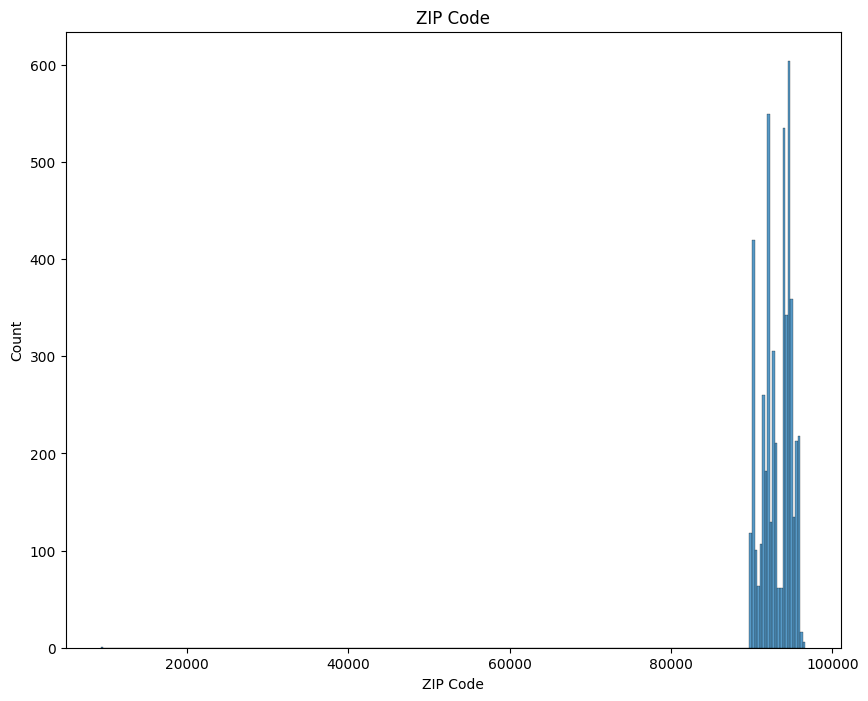

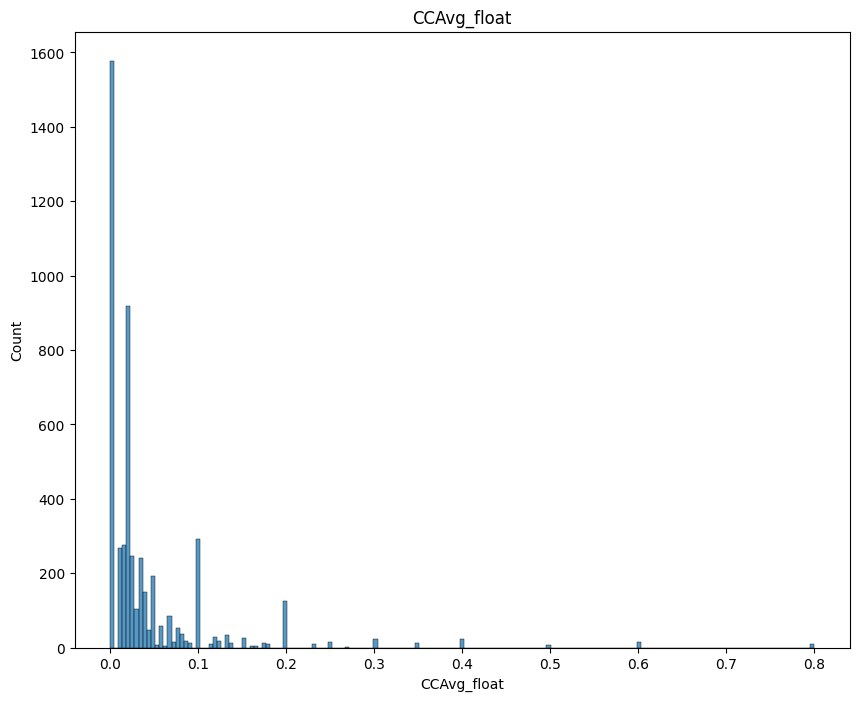

In [ ]:
for col in cont:
  plt.figure(figsize=(10, 8))
  sns.histplot(data=df, x=df[col])
  plt.title(col)
  plt.show()
  print()

Dari histogram untuk kolom **Age** dan **Experience**, kita dapat melihat bahwa keduanya hampir berdistribusi normal. Dengan Age customer ada dalam range 30-60an tahun, sedangkan Experience customer sendiri ada dalam range 4-40an tahun.

Sedangkan, data-data numeric yang lain seperti **CCAvg, ZIP Code, Mortage dan Income**, terlihat memiliki distribusi yang cukup skewed.

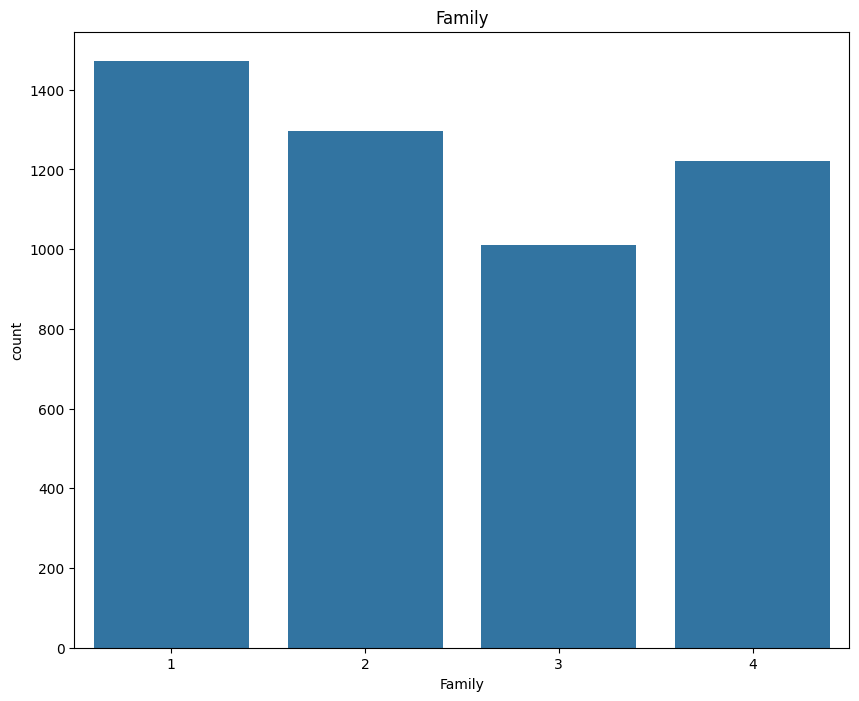

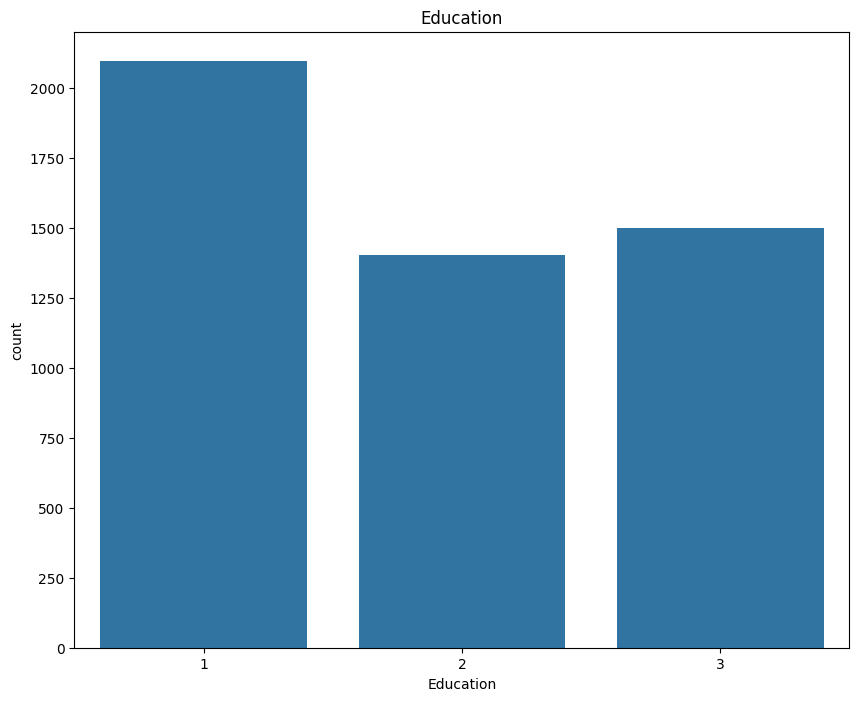

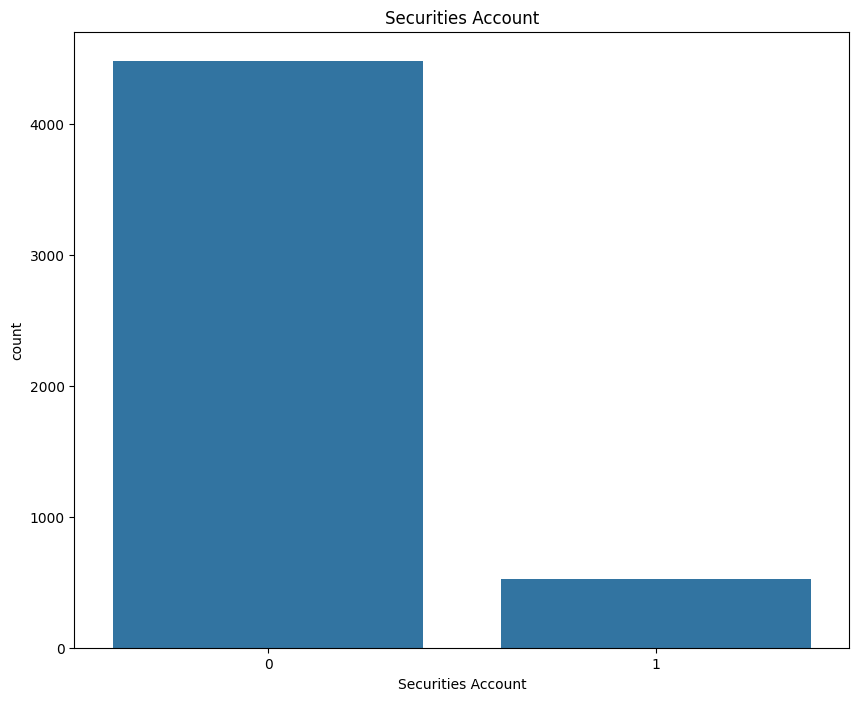

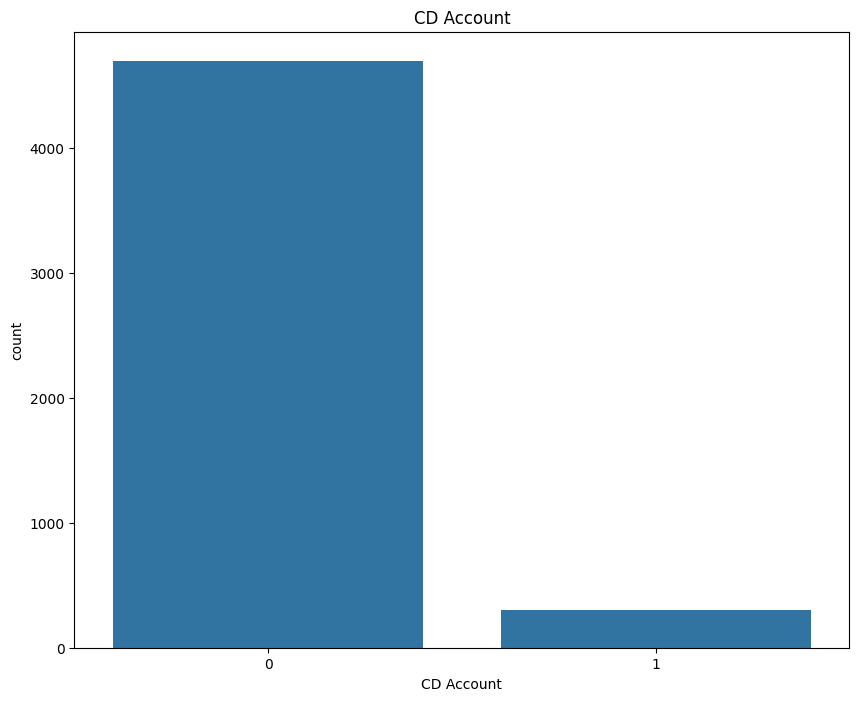

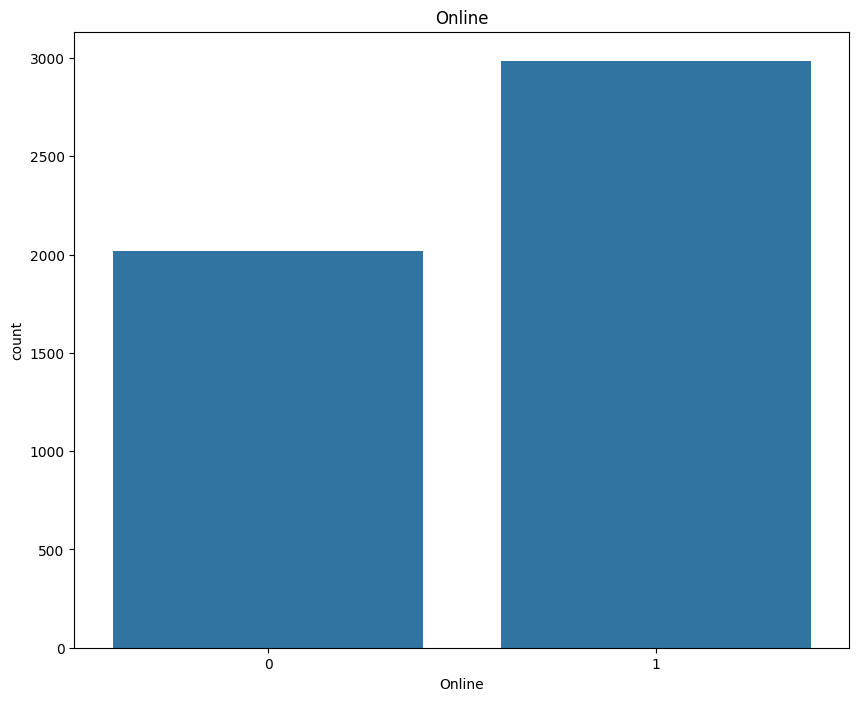

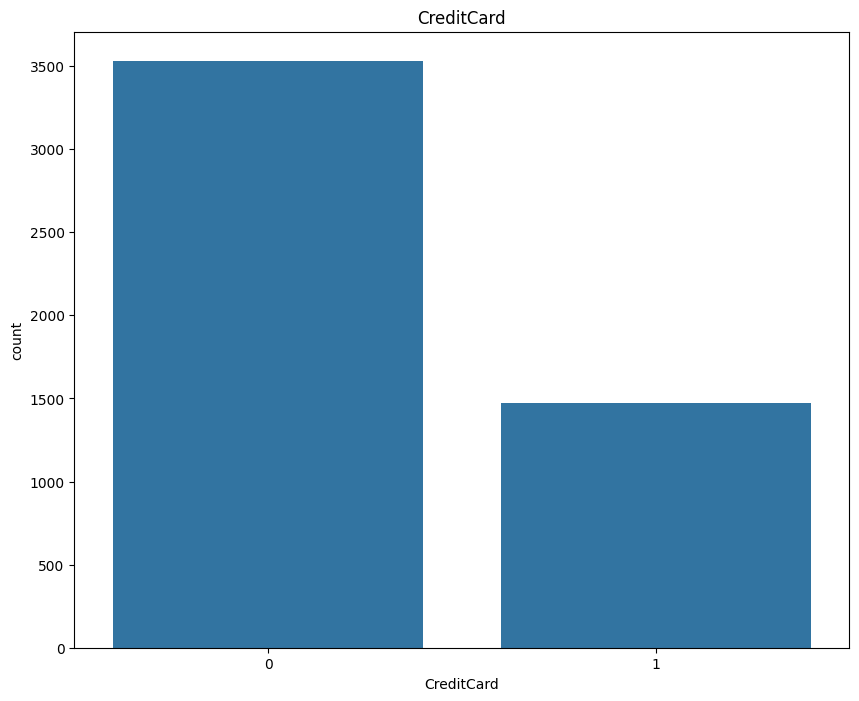

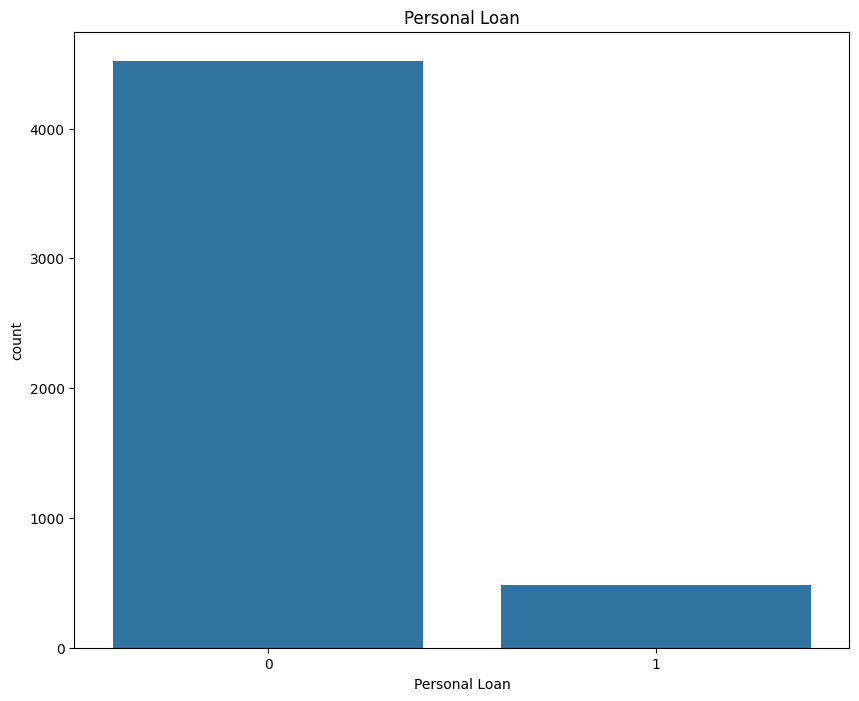

In [ ]:
for col in cat:
  plt.figure(figsize=(10, 8))
  sns.countplot(data=df, x=df[col])
  plt.title(col)
  plt.show()
  print()

In [ ]:
personal_loan = df['Personal Loan'].value_counts(normalize=True)
personal_loan

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

Dapat dilihat pada count chart diatas bahwa ada beberapa variabel terutama **Personal Loan** sendiri memiliki distribusi class yang sangat imbalance di mana perbandingan antara yang mendapat dan tidak mendapat Personal Loans sekitar 1:9. Hal ini nantinya pasti akan sangat berpengaruh pada proses training dan prediction.

## Corelation between personal loan and categorical variables

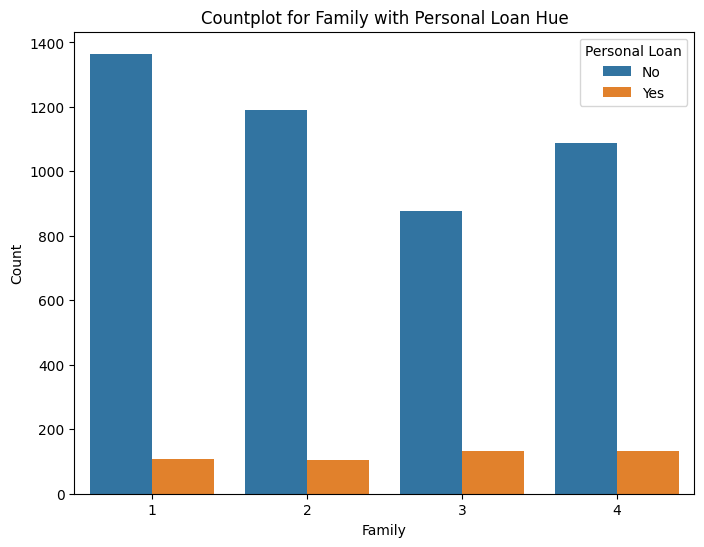

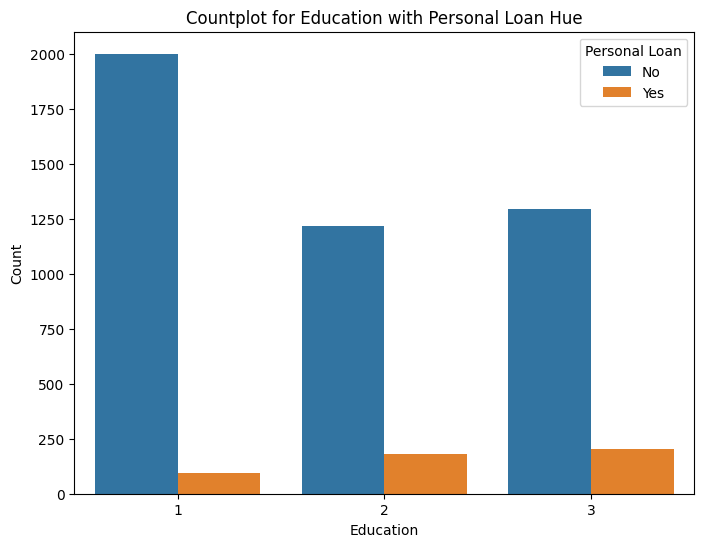

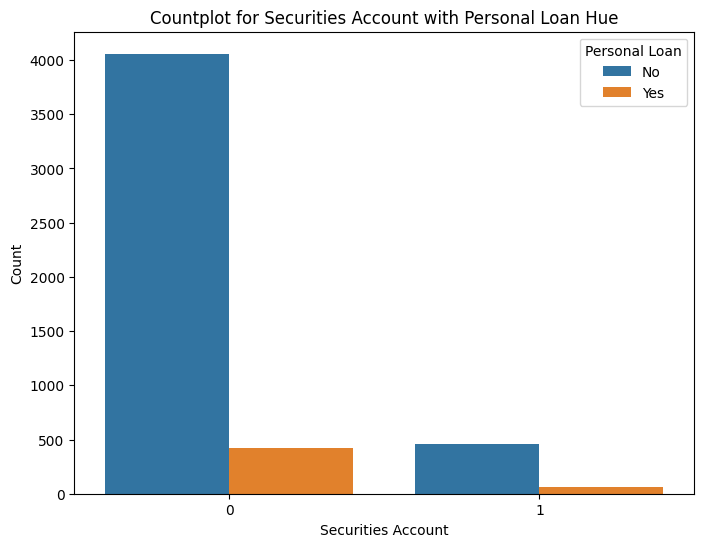

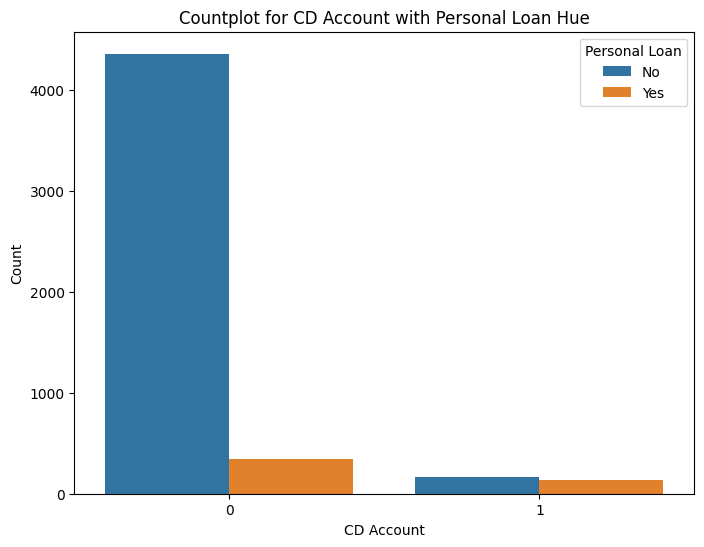

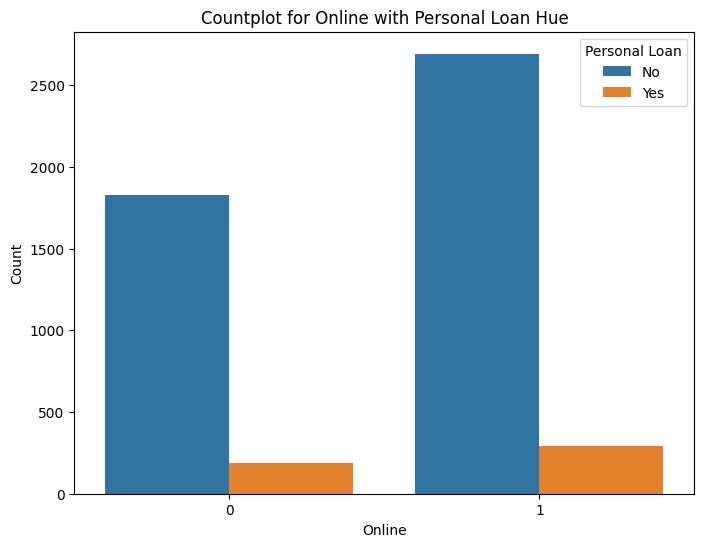

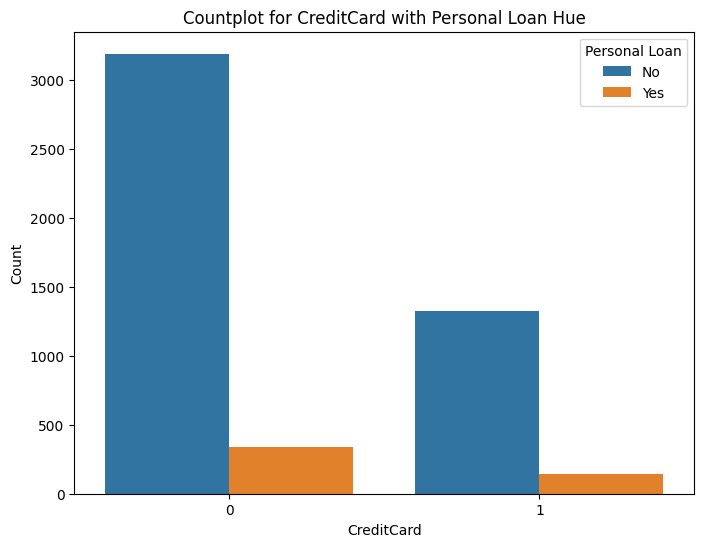

In [ ]:
subset = df[['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']]

melted = pd.melt(subset, id_vars=['Personal Loan'], var_name='feature', value_name='Value')

for col in cat:
    if col == 'Personal Loan':
      continue
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Value', hue='Personal Loan', data=melted[melted['feature'] == col])
    plt.title(f'Countplot for {col} with Personal Loan Hue')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Personal Loan', labels=['No', 'Yes'])
    plt.show()

Karena dari distribusi antar class untuk personal loans sudah jelas imbalance, kita tidak dapat melihat perbandingan yang jelas untuk kelas mana pada suatu feature tertentu yang lebih memungkinkan untuk mendapat personal loan

# b) Split Data

In [ ]:
df.drop(columns=['CCAvg'], inplace=True)
df

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_float
0,25,1,49,91107,4,1,0,0,1,0,0,0,0.016667
1,45,19,34,90089,3,1,0,0,1,0,0,0,0.020000
2,39,15,11,94720,1,1,0,0,0,0,0,0,0.020000
3,35,9,100,94112,1,2,0,0,0,0,0,0,0.028571
4,35,8,45,91330,4,2,0,0,0,0,0,1,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,3,0,0,0,0,1,0,0.011111
4996,30,4,15,92037,4,1,85,0,0,0,1,0,0.000000
4997,63,39,24,93023,2,3,0,0,0,0,0,0,0.000000
4998,65,40,49,90034,3,2,0,0,0,0,1,0,0.000000


In [ ]:
x = df.drop(columns=["Personal Loan"], axis=1)
y = df["Personal Loan"]

In [ ]:
from sklearn.model_selection import train_test_split

train_size = 0.8
val_size = 0.1
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

print("Training set size:", x_train.shape, y_train.shape)
print("Validation set size:", x_val.shape, y_val.shape)
print("Test set size:", x_test.shape, y_test.shape)

Training set size: (4000, 12) (4000,)
Validation set size: (500, 12) (500,)
Test set size: (500, 12) (500,)


# c) Dataset Problems

[LO 3, LO 4, 5 poin] Identifikasikan tantangan dan kesulitan dari data tabular yang diberikan. Hal ini terkait dengan Kualitas Data (Data Kotor dan Hilang, Outliers), Jenis Data (Heterogenitas Fitur, Encoding Fitur Kategorikal, Skala dan Normalisasi) dan Ketidakseimbangan Kelas (Class Imbalance)

Pada dataset yang diberikan, setelah dilakukan eksplorasi, tidak terdapat missing value maupun duplicate value. Namun, justru tantangan yang pertama kali ditemukan adalah kesalahan data type dari kolom CCAvg. Kolom CCAvg memiliki data type object meskipun penulisan datanya berbentuk pecahan dan merupakan kolom dengan deskripsi "the average monthly credit card spending" yang sangat dekat kaitannya dengan data type float. Oleh karena itu, data type kolom tersebut harus diubah terlebih dahulu ke float.


Tidak sampai disana, dalam proses perubahan data type, terlihat pula ada penyebut pada CCAvg yang bernilai 0. Saya melakukan handling untuk anomali tersebut dengan menganggapnya sebagai NaN yang kemudian saya impute dengan median karena distribusinya yang tidak normal distribution.

Data yang diberikan sudah diencode terlebih dahulu sehingga tidak diperlukan adanya feature encoding. Namun, meskipun mapping untuk encodingnya kurang lebih dapat diketahui dari deskripsi dataset, agak disayangkan karena mapping yang benar dan jelasnya tidak diberitahu sehingga hanya bisa menebak dari deskripsi dataset yang diberikan. Contohnya, pada kolom Education, dalam deskripsinya tertulis "the level of customer's Education(undergraduate,graduate,professional)". Dari deskripsi yang diberikan, kita hanya bisa menebak bahwa:
* class 1 = undergraduate
* class 2 = graduate
* class 3 = professional

Selain itu, terdapat pula beberapa outlier pada beberapa feature di dataset yang diberikan. Untuk handling outlier tersebut, saya putuskan untuk menggunakan robust scaler. Hal ini dikarenakan beberapa meskipun scaling method yang lain juga sama-sama bertujuan untuk mengubah distribusi data menjadi seragam dan dapat digunakan untuk handle outlier, namun, outlier juga bisa memberikan impact pada proses scaling biasa. Di sisi lain, RobustScaler dirancang untuk menangani outlier robustly dengan menyesuaikan fitur berdasarkan median dan interquartil range, yang membuatnya lebih tidak sensitif terhadap outlier.

Saya sendiri memilih untuk tidak melakukan imputation untuk handle outlier karena hal tersebut memerlukan seorang expert dalam bidangnya. Di sisi lain juga, saya merasa model juga perlu ditrain dengan outlier didalamnya agar ketika melakukan prediksi dan ada data baru dengan outlier yang masuk, model sudah rentan terhadap outlier tersebut dan dapat melakukan prediksi dengan tepat. Terakhir, dalam dataset ini, saya menggunakan robust scaling untuk semua numeric variabel agar datanya lebih seragam karena mendapat perlakuan yang sama.


In [ ]:
x_train

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,CCAvg_float
408,60,36,89,91745,2,1,0,0,0,1,0,0.025000
3737,44,19,30,91423,1,3,0,0,0,1,0,0.000000
3889,26,0,19,93014,1,2,121,0,0,1,0,0.000000
568,34,9,41,92101,2,1,161,0,0,1,1,0.000000
1041,56,32,51,92780,4,1,0,0,0,0,0,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...
4587,37,11,59,94720,4,3,0,0,0,0,0,0.000000
2341,36,10,91,92028,1,3,289,0,0,1,0,0.020000
1585,57,31,131,90502,2,1,0,0,0,0,0,0.028571
3152,40,15,83,90275,1,3,0,0,0,0,0,0.020000


In [ ]:
from sklearn.preprocessing import RobustScaler

RS = RobustScaler()

x_train_scaled = RS.fit_transform(x_train)
x_val_scaled = RS.transform(x_val)
x_test_scaled = RS.transform(x_test)

Dari dataset yang diberikan juga terdapat class imbalance terutama di variabel outputnya yaitu personal loan. Di mana kasus class 0 (tidak mendapat personal loan) jauh lebih banyak dibandingkan dengan kasus class 1 (mendapatkan personal loan), yaitu 9:1 perbandingannya. Oleh karena itu, dalam kasus architecture modification Ver, saya memberikan class weight untuk handle data imbalance ini. Namun, ternyata hal tersebut malah membuat performa model saya menurun. Oleh karena itu, dalam Ver 5 atau Versi optimal setelah modifikasi saya tidak lagi menerapkan class weight.

# d) Modelling Baseline

LO 3, LO 4, 5 poin] Buatlah arsitektur baseline dengan n nodes input layer, 2 buah hidden layer
dengan banyak 2 × n nodes awal dan layer akhir banyak kelas nya (n, 2 × n, 2 × n, num_class).
Keterangan: n adalah banyak input dan num_class adalah banyak kelas. Activation function
untuk tiap hidden layer menggunakan ReLU

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from keras.metrics import AUC

In [ ]:
n = len(x.columns)
num_class = 2
print(f"n : {n}")
print(f"num_class : {num_class}")

n : 12
num_class : 2


In [ ]:
# karena output dari model yang digunakan berjumlah n_class / 2 sehingga, harus dilakukan modifikasi/encoding terhadap y untuk menyesuaikan dengan output yang diberikan model

from sklearn.preprocessing import OneHotEncoder

y_train_series = y_train.values
y_val_series = y_val.values
y_test_series = y_test.values

OHE = OneHotEncoder(sparse=False, categories='auto')

y_train_encoded = OHE.fit_transform(y_train_series.reshape(-1, 1))
y_val_encoded = OHE.transform(y_val_series.reshape(-1, 1))
y_test_encoded = OHE.transform(y_test_series.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
baseline = Sequential([
        # Input layer with n nodes
        Dense(n, input_shape=(n,)),

        # First hidden layer with 2 * n nodes
        Dense(2 * n, activation='relu'),

        # Second hidden layer with 2 * n nodes
        Dense(2 * n, activation='relu'),

        # Output layer with num_class nodes
        Dense(num_class, activation='softmax')
    ])

baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 2)                 50        
                                                                 
Total params: 1118 (4.37 KB)
Trainable params: 1118 (4.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
baseline.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', AUC()])

### Unscaled data

In [ ]:
history = baseline.fit(x_train, y_train_encoded, validation_data=(x_val, y_val_encoded), epochs=50)

Epoch 1/50
125/125 [==============================] - 3s 11ms/step - loss: 71.5081 - accuracy: 0.8257 - auc: 0.8267 - val_loss: 33.1629 - val_accuracy: 0.9060 - val_auc: 0.9060
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 77.9516 - accuracy: 0.8292 - auc: 0.8328 - val_loss: 119.3777 - val_accuracy: 0.9060 - val_auc: 0.9060
Epoch 3/50
125/125 [==============================] - 0s 4ms/step - loss: 67.9672 - accuracy: 0.8245 - auc: 0.8295 - val_loss: 14.4005 - val_accuracy: 0.9060 - val_auc: 0.9060
Epoch 4/50
125/125 [==============================] - 1s 4ms/step - loss: 61.7478 - accuracy: 0.8275 - auc: 0.8286 - val_loss: 60.1188 - val_accuracy: 0.9060 - val_auc: 0.9060
Epoch 5/50
125/125 [==============================] - 1s 5ms/step - loss: 42.0167 - accuracy: 0.8342 - auc: 0.8356 - val_loss: 36.9544 - val_accuracy: 0.0940 - val_auc: 0.0940
Epoch 6/50
125/125 [==============================] - 0s 4ms/step - loss: 75.9550 - accuracy: 0.8303 - auc: 0.8355 - v

In [ ]:
loss, accuracy, auc = baseline.evaluate(x_test, y_test_encoded)
print("Test Loss:", loss, "Test Accuracy:", accuracy, "Test AUC:", auc)

16/16 [==============================] - 0s 7ms/step - loss: 5.7709 - accuracy: 0.9020 - auc: 0.9020
Test Loss: 5.770867347717285 Test Accuracy: 0.9020000100135803 Test AUC: 0.9019999504089355


In [ ]:
baseline_predictions = baseline.predict(x_test)
baseline_predictions

16/16 [==============================] - 0s 2ms/step


array([[9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 1.06868728e-26],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 1.12131132e-36],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 7.66162828e-37],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 5.14099092e-21],
       [9.99999940e-01, 8.81680743e-35],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00],
       [9.99986112e-01, 1.37920233e-05],
       [9.99999940e-01, 4.22548181e-19],
       [9.99999940e-01, 1.85566531e-24],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 1.21022648e-22],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00],
       [9.999999

#### Visualisasi train val loss unscaled model

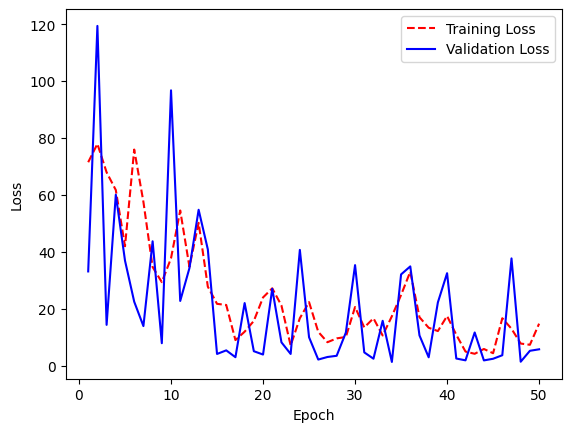

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Scaled data

In [ ]:
history_scaled = baseline.fit(x_train_scaled, y_train_encoded, validation_data=(x_val_scaled, y_val_encoded), epochs=50)

Epoch 1/50
125/125 [==============================] - 3s 11ms/step - loss: 0.2775 - accuracy: 0.9100 - auc: 0.9560 - val_loss: 0.1725 - val_accuracy: 0.9260 - val_auc: 0.9829
Epoch 2/50
125/125 [==============================] - 1s 4ms/step - loss: 0.1757 - accuracy: 0.9308 - auc: 0.9811 - val_loss: 0.1496 - val_accuracy: 0.9320 - val_auc: 0.9877
Epoch 3/50
125/125 [==============================] - 1s 5ms/step - loss: 0.1449 - accuracy: 0.9425 - auc: 0.9874 - val_loss: 0.1348 - val_accuracy: 0.9440 - val_auc: 0.9898
Epoch 4/50
125/125 [==============================] - 1s 5ms/step - loss: 0.1381 - accuracy: 0.9485 - auc: 0.9883 - val_loss: 0.1327 - val_accuracy: 0.9460 - val_auc: 0.9900
Epoch 5/50
125/125 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.9482 - auc: 0.9883 - val_loss: 0.1352 - val_accuracy: 0.9420 - val_auc: 0.9890
Epoch 6/50
125/125 [==============================] - 1s 5ms/step - loss: 0.1285 - accuracy: 0.9520 - auc: 0.9897 - val_loss: 0.1

In [ ]:
loss, accuracy, auc = baseline.evaluate(x_test_scaled, y_test_encoded)
print("Test Loss:", loss, "Test Accuracy:", accuracy, "Test AUC:", auc)

16/16 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9700 - auc: 0.9976
Test Loss: 0.062455352395772934 Test Accuracy: 0.9700000286102295 Test AUC: 0.9975879192352295


In [ ]:
baseline_predictions_scaled = baseline.predict(x_test_scaled)
baseline_predictions_scaled

16/16 [==============================] - 0s 3ms/step


array([[9.99939740e-01, 6.01761058e-05],
       [9.50599492e-01, 4.94004972e-02],
       [9.99999940e-01, 5.20577466e-08],
       [9.99988616e-01, 1.12674479e-05],
       [1.38634637e-01, 8.61365378e-01],
       [9.81356740e-01, 1.86430905e-02],
       [9.48633313e-01, 5.13667203e-02],
       [8.99827778e-01, 1.00172125e-01],
       [9.99997079e-01, 2.82056862e-06],
       [3.81296873e-03, 9.96187031e-01],
       [1.65406302e-01, 8.34593713e-01],
       [9.99859333e-01, 1.40800927e-04],
       [9.82063413e-01, 1.79367140e-02],
       [9.99995768e-01, 4.13312364e-06],
       [9.56643760e-01, 4.33563069e-02],
       [8.11601996e-01, 1.88398063e-01],
       [2.62364030e-01, 7.37636089e-01],
       [9.28751379e-02, 9.07124817e-01],
       [9.79660034e-01, 2.03400217e-02],
       [9.99999940e-01, 3.55405566e-11],
       [9.91628706e-01, 8.37128516e-03],
       [1.10919327e-02, 9.88907933e-01],
       [9.98537600e-01, 1.46231812e-03],
       [9.99994576e-01, 5.41398276e-06],
       [9.999892

#### Visualisasi train val loss scaled model

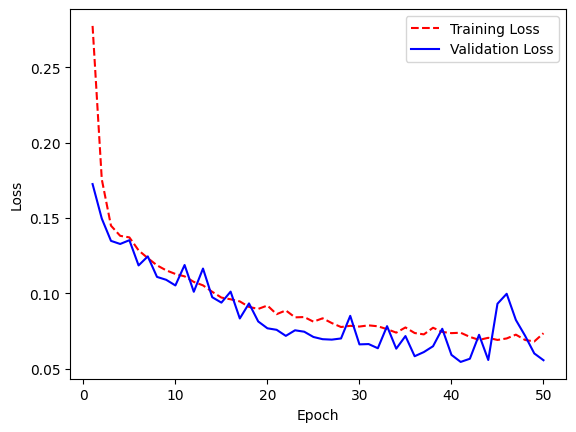

In [ ]:
training_loss = history_scaled.history['loss']
val_loss = history_scaled.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Akurasi dan AUC score dari model menggunakan data yang sudah di scaled memang lebih tinggi dengan loss yang lebih kecil. Akurasi untuk model dengan data yang sudah di scaled adalah 0.9700000286102295 dan AUC score 0.9975879192352295 sedangkan, untuk data yang belum di scaled adalah Accuracy: 0.9020000100135803; AUC : 0.9019999504089355.

Selain itu, dapat dilihat pula dari plot train-val loss bahwa model belum mencapai convergence/belum stabil convergencenya. Hal ini bisa dikarenakan data yang imbalance, architechture yang kurang sesuai serta adanya potensi overfitting.

# e) Architecture Modification

[LO 3, LO 4, 10 poin] Setelah mengetahui hasil dari nomor (1d), modifikasi arsitektur
tersebutuntuk mendapatkan nilai akurasi optimal yang kalian dapatkan (kalian dapat
menambahkan atau mengurangi arsitektur tersebut, atau mengganti hyperparameter, atau
menggunakan tuning pada hyperparameter). Jelaskan alasan kalian untuk menggunakan
pendekatan yang kalian pilih terkait dengan tantangan dan dan kesulitan yang dihadapi dalam
data tabular tersebut (1c).

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, LeakyReLU

In [ ]:
n = len(x.columns)
num_class = 2
print(f"n : {n}")
print(f"num_class : {num_class}")

n : 12
num_class : 2


## Ver 1

In [ ]:
modified = Sequential([
        # Input layer with n nodes
        Dense(n, input_shape=(n,)),

        # First hidden layer with 2 * n nodes
        Dense(n * 2),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),

        # Second hidden layer with 2 * n nodes
        Dense(n),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),

        # Output layer with num_class nodes
        Dense(num_class, activation='softmax')
    ])

modified.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 24)                312       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 24)                0         
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 12)                0         
                                                                 
 dropout_1 (Dropout)         (None, 12)               

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_model_weights.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
modified.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy', AUC()])

In [ ]:
personal_loan = y_train.value_counts(normalize=True)
personal_loan

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

In [ ]:
# assign class weight untuk handle imbalance data
class_weight = {0: 0.96, 1: 9.04}

In [ ]:
history2 = modified.fit(x_train_scaled, y_train_encoded, validation_data=(x_val_scaled, y_val_encoded), epochs=50, class_weight=class_weight, callbacks=[early_stopping_monitor])

Epoch 1/50
125/125 [==============================] - 3s 10ms/step - loss: 1.4893 - accuracy: 0.7128 - auc_1: 0.8008 - val_loss: 1.3648 - val_accuracy: 0.5220 - val_auc_1: 0.6691
Epoch 2/50
125/125 [==============================] - 1s 8ms/step - loss: 0.9909 - accuracy: 0.7955 - auc_1: 0.8658 - val_loss: 0.3238 - val_accuracy: 0.8680 - val_auc_1: 0.9383
Epoch 3/50
125/125 [==============================] - 1s 8ms/step - loss: 0.8882 - accuracy: 0.8110 - auc_1: 0.8787 - val_loss: 1.1325 - val_accuracy: 0.6780 - val_auc_1: 0.7712
Epoch 4/50
125/125 [==============================] - 1s 10ms/step - loss: 32.5792 - accuracy: 0.5890 - auc_1: 0.5994 - val_loss: 0.4326 - val_accuracy: 0.9200 - val_auc_1: 0.9579
Epoch 5/50
125/125 [==============================] - 1s 8ms/step - loss: 5.6199 - accuracy: 0.7997 - auc_1: 0.8282 - val_loss: 0.8756 - val_accuracy: 0.8780 - val_auc_1: 0.9192
Epoch 6/50
125/125 [==============================] - 1s 6ms/step - loss: 1.5943 - accuracy: 0.8545 - auc_1

In [ ]:
loss, accuracy, auc = modified.evaluate(x_test_scaled, y_test_encoded)
print("Test Loss:", loss, "Test Accuracy:", accuracy, "Test AUC:", auc)

16/16 [==============================] - 0s 6ms/step - loss: 0.2333 - accuracy: 0.8940 - auc_1: 0.9657
Test Loss: 0.23332597315311432 Test Accuracy: 0.8939999938011169 Test AUC: 0.9657039642333984


In [ ]:
modified_pred = modified.predict(x_test_scaled)
modified_pred

16/16 [==============================] - 0s 3ms/step


array([[9.99992788e-01, 7.18587717e-06],
       [4.71783690e-02, 9.52821612e-01],
       [9.99999940e-01, 0.00000000e+00],
       [9.99999940e-01, 5.47300191e-11],
       [2.92679280e-01, 7.07320750e-01],
       [7.39079654e-01, 2.60920227e-01],
       [9.18448985e-01, 8.15510005e-02],
       [9.99977648e-01, 2.22486651e-05],
       [9.81971860e-01, 1.80281680e-02],
       [1.39198953e-03, 9.98607993e-01],
       [3.76300037e-01, 6.23700023e-01],
       [9.99999940e-01, 4.16181395e-11],
       [6.99851990e-01, 3.00148070e-01],
       [9.99639153e-01, 3.60801176e-04],
       [6.62997961e-01, 3.37002099e-01],
       [5.20641170e-02, 9.47935879e-01],
       [1.27260521e-01, 8.72739494e-01],
       [1.35945275e-01, 8.64054680e-01],
       [8.80729854e-01, 1.19270153e-01],
       [9.99999940e-01, 2.70665620e-19],
       [9.28813636e-01, 7.11863115e-02],
       [4.34804661e-03, 9.95651960e-01],
       [9.99988616e-01, 1.13121614e-05],
       [9.99999940e-01, 3.78728035e-18],
       [9.999999

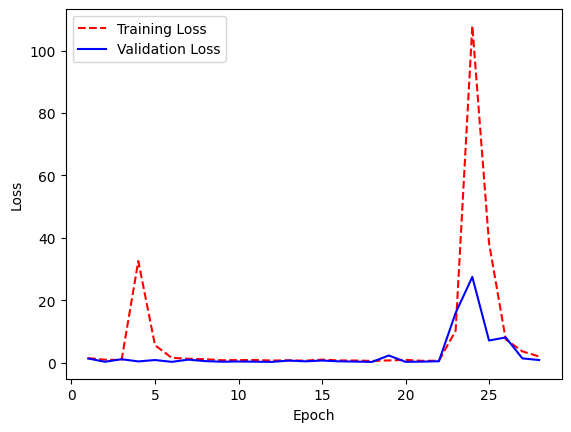

In [ ]:
training_loss = history2.history['loss']
val_loss = history2.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Ver 2 (tanpa class weight dari ver 1) (BEST No 2)

In [ ]:
history2 = modified.fit(x_train_scaled, y_train_encoded, validation_data=(x_val_scaled, y_val_encoded), epochs=50, callbacks=[early_stopping_monitor])

Epoch 1/50
125/125 [==============================] - 1s 4ms/step - loss: 0.1990 - accuracy: 0.9337 - auc_1: 0.9792 - val_loss: 0.1450 - val_accuracy: 0.9420 - val_auc_1: 0.9881
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1548 - accuracy: 0.9408 - auc_1: 0.9855 - val_loss: 0.1386 - val_accuracy: 0.9460 - val_auc_1: 0.9895
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1486 - accuracy: 0.9433 - auc_1: 0.9864 - val_loss: 0.1342 - val_accuracy: 0.9500 - val_auc_1: 0.9889
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1526 - accuracy: 0.9415 - auc_1: 0.9862 - val_loss: 0.1375 - val_accuracy: 0.9460 - val_auc_1: 0.9898
Epoch 5/50
125/125 [==============================] - 0s 4ms/step - loss: 0.1424 - accuracy: 0.9433 - auc_1: 0.9877 - val_loss: 0.1320 - val_accuracy: 0.9520 - val_auc_1: 0.9902
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9463 - auc_1: 0

In [ ]:
loss, accuracy, auc = modified.evaluate(x_test_scaled, y_test_encoded)
print("Test Loss:", loss, "Test Accuracy:", accuracy, "Test AUC:", auc)

16/16 [==============================] - 0s 14ms/step - loss: 0.0833 - accuracy: 0.9640 - auc_1: 0.9959
Test Loss: 0.0833049938082695 Test Accuracy: 0.9639999866485596 Test AUC: 0.9959499835968018


In [ ]:
modified_pred = modified.predict(x_test_scaled)
modified_pred

16/16 [==============================] - 0s 3ms/step


array([[9.99999225e-01, 7.50927882e-07],
       [8.67038071e-01, 1.32961810e-01],
       [9.99999940e-01, 1.53260792e-16],
       [9.99999702e-01, 2.81060437e-07],
       [3.77422482e-01, 6.22577608e-01],
       [9.83423293e-01, 1.65768322e-02],
       [9.64035213e-01, 3.59646976e-02],
       [8.74191701e-01, 1.25808328e-01],
       [9.99999940e-01, 3.95804882e-08],
       [8.17962049e-04, 9.99182045e-01],
       [6.52125180e-01, 3.47874790e-01],
       [9.99999940e-01, 3.82217635e-08],
       [9.97507751e-01, 2.49222387e-03],
       [9.99839544e-01, 1.60553478e-04],
       [9.16355312e-01, 8.36446732e-02],
       [9.22367990e-01, 7.76319951e-02],
       [6.96940944e-02, 9.30305839e-01],
       [1.89743891e-01, 8.10256064e-01],
       [9.78870511e-01, 2.11294722e-02],
       [9.99999940e-01, 2.10007352e-14],
       [9.85699058e-01, 1.43008828e-02],
       [2.73406673e-02, 9.72659290e-01],
       [9.99585807e-01, 4.14236158e-04],
       [9.99999940e-01, 4.70305883e-09],
       [9.999999

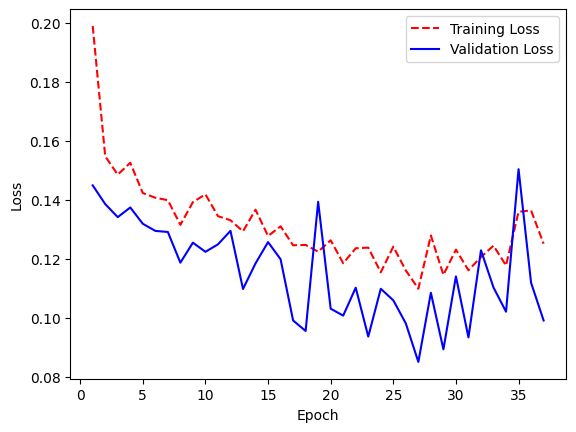

In [ ]:
training_loss = history2.history['loss']
val_loss = history2.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Ver 3

In [ ]:
modified2 = Sequential([
        # Input layer with n nodes
        Dense(n, input_shape=(n,)),

        # First hidden layer with 2 * n nodes
        Dense(n * 2, activation='relu'),

        # Second hidden layer with 2 * n nodes
        Dense(n, activation='relu'),

        # Second hidden layer with 2 * n nodes
        Dense(n/2, activation='relu'),

        # Output layer with num_class nodes
        Dense(num_class, activation='softmax')
    ])

modified2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 24)                312       
                                                                 
 dense_10 (Dense)            (None, 12)                300       
                                                                 
 dense_11 (Dense)            (None, 6)                 78        
                                                                 
 dense_12 (Dense)            (None, 2)                 14        
                                                                 
Total params: 860 (3.36 KB)
Trainable params: 860 (3.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modified2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy', AUC()])

In [ ]:
history3 = modified2.fit(x_train_scaled, y_train_encoded, validation_data=(x_val_scaled, y_val_encoded), epochs=50, callbacks=[early_stopping_monitor])

Epoch 1/50
125/125 [==============================] - 6s 21ms/step - loss: 0.2464 - accuracy: 0.8942 - auc_2: 0.9669 - val_loss: 0.2184 - val_accuracy: 0.9060 - val_auc_2: 0.9717
Epoch 2/50
125/125 [==============================] - 1s 11ms/step - loss: 0.2250 - accuracy: 0.9137 - auc_2: 0.9707 - val_loss: 0.3748 - val_accuracy: 0.9060 - val_auc_2: 0.9592
Epoch 3/50
125/125 [==============================] - 1s 10ms/step - loss: 0.3206 - accuracy: 0.9040 - auc_2: 0.9214 - val_loss: 0.3172 - val_accuracy: 0.9060 - val_auc_2: 0.9060
Epoch 4/50
125/125 [==============================] - 1s 8ms/step - loss: 0.3212 - accuracy: 0.9040 - auc_2: 0.9030 - val_loss: 0.3119 - val_accuracy: 0.9060 - val_auc_2: 0.9060
Epoch 5/50
125/125 [==============================] - 1s 8ms/step - loss: 0.3179 - accuracy: 0.9040 - auc_2: 0.9080 - val_loss: 0.3118 - val_accuracy: 0.9060 - val_auc_2: 0.9060
Epoch 6/50
125/125 [==============================] - 1s 6ms/step - loss: 0.3179 - accuracy: 0.9040 - auc_2

In [ ]:
loss, accuracy, auc = modified2.evaluate(x_test_scaled, y_test_encoded)
print("Test Loss:", loss, "Test Accuracy:", accuracy, "Test AUC:", auc)

16/16 [==============================] - 0s 7ms/step - loss: 0.2195 - accuracy: 0.9020 - auc_2: 0.9708
Test Loss: 0.21953466534614563 Test Accuracy: 0.9020000100135803 Test AUC: 0.9708240032196045


In [ ]:
modified_pred = modified2.predict(x_test_scaled)
modified_pred

16/16 [==============================] - 0s 5ms/step


array([[9.82198119e-01, 1.78017952e-02],
       [7.07612157e-01, 2.92387903e-01],
       [9.85897064e-01, 1.41028808e-02],
       [9.83870625e-01, 1.61293373e-02],
       [7.07612157e-01, 2.92387903e-01],
       [9.35364902e-01, 6.46350980e-02],
       [8.39681685e-01, 1.60318226e-01],
       [7.07612157e-01, 2.92387903e-01],
       [9.99377310e-01, 6.22742868e-04],
       [7.07612157e-01, 2.92387903e-01],
       [8.07238042e-01, 1.92761898e-01],
       [9.60041046e-01, 3.99588831e-02],
       [9.48558033e-01, 5.14419600e-02],
       [9.92648005e-01, 7.35191349e-03],
       [8.93659830e-01, 1.06340192e-01],
       [7.07612157e-01, 2.92387903e-01],
       [7.07612157e-01, 2.92387903e-01],
       [7.07612157e-01, 2.92387903e-01],
       [8.90812933e-01, 1.09187029e-01],
       [9.99861717e-01, 1.38382296e-04],
       [9.36551929e-01, 6.34480193e-02],
       [7.07612157e-01, 2.92387903e-01],
       [8.72213364e-01, 1.27786592e-01],
       [9.80459213e-01, 1.95407830e-02],
       [9.924347

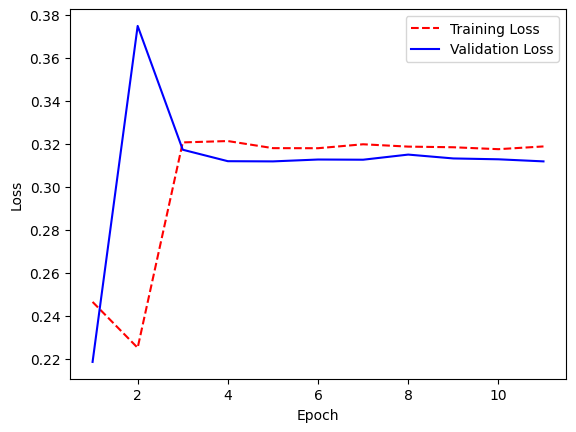

In [ ]:
training_loss = history3.history['loss']
val_loss = history3.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Ver 4

In [ ]:
modified3 = Sequential([
        # Input layer with n nodes
        Dense(n, input_shape=(n,)),

        Dense(n * 8, activation='relu'),

        Dense(n * 4, activation='relu'),

        Dense(n * 2, activation='relu'),

        Dense(n, activation='relu'),

        Dense(n/2, activation='relu'),

        Dense(4, activation='relu'),

        # Output layer with 1 class nodes
        Dense(1, activation='sigmoid')
    ])

modified3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 12)                156       
                                                                 
 dense_14 (Dense)            (None, 96)                1248      
                                                                 
 dense_15 (Dense)            (None, 48)                4656      
                                                                 
 dense_16 (Dense)            (None, 24)                1176      
                                                                 
 dense_17 (Dense)            (None, 12)                300       
                                                                 
 dense_18 (Dense)            (None, 6)                 78        
                                                                 
 dense_19 (Dense)            (None, 4)                

In [ ]:
modified3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy', AUC()])

In [ ]:
history4 = modified3.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=50, callbacks=[early_stopping_monitor])

Epoch 1/50
125/125 [==============================] - 7s 12ms/step - loss: 0.2842 - accuracy: 0.8997 - auc_3: 0.7873 - val_loss: 0.2893 - val_accuracy: 0.9060 - val_auc_3: 0.5998
Epoch 2/50
125/125 [==============================] - 1s 9ms/step - loss: 0.2979 - accuracy: 0.9050 - auc_3: 0.6098 - val_loss: 0.2858 - val_accuracy: 0.9060 - val_auc_3: 0.5998
Epoch 3/50
125/125 [==============================] - 1s 9ms/step - loss: 0.2880 - accuracy: 0.9085 - auc_3: 0.6005 - val_loss: 0.2832 - val_accuracy: 0.9140 - val_auc_3: 0.5998
Epoch 4/50
125/125 [==============================] - 1s 9ms/step - loss: 0.2852 - accuracy: 0.9122 - auc_3: 0.6091 - val_loss: 0.2830 - val_accuracy: 0.9140 - val_auc_3: 0.5998
Epoch 5/50
125/125 [==============================] - 1s 9ms/step - loss: 0.2871 - accuracy: 0.9112 - auc_3: 0.6079 - val_loss: 0.2834 - val_accuracy: 0.9140 - val_auc_3: 0.5998
Epoch 6/50
125/125 [==============================] - 1s 8ms/step - loss: 0.2952 - accuracy: 0.9115 - auc_3: 

In [ ]:
loss, accuracy, auc = modified3.evaluate(x_test_scaled, y_test)
print("Test Loss:", loss, "Test Accuracy:", accuracy, "Test AUC:", auc)

16/16 [==============================] - 0s 3ms/step - loss: 0.2864 - accuracy: 0.9120 - auc_3: 0.6147
Test Loss: 0.2863827049732208 Test Accuracy: 0.9120000004768372 Test AUC: 0.6146884560585022


In [ ]:
modified_pred = modified2.predict(x_test_scaled)
modified_pred

16/16 [==============================] - 0s 2ms/step


array([[9.82198119e-01, 1.78017952e-02],
       [7.07612157e-01, 2.92387903e-01],
       [9.85897064e-01, 1.41028808e-02],
       [9.83870625e-01, 1.61293373e-02],
       [7.07612157e-01, 2.92387903e-01],
       [9.35364902e-01, 6.46350980e-02],
       [8.39681685e-01, 1.60318226e-01],
       [7.07612157e-01, 2.92387903e-01],
       [9.99377310e-01, 6.22742868e-04],
       [7.07612157e-01, 2.92387903e-01],
       [8.07238042e-01, 1.92761898e-01],
       [9.60041046e-01, 3.99588831e-02],
       [9.48558033e-01, 5.14419600e-02],
       [9.92648005e-01, 7.35191349e-03],
       [8.93659830e-01, 1.06340192e-01],
       [7.07612157e-01, 2.92387903e-01],
       [7.07612157e-01, 2.92387903e-01],
       [7.07612157e-01, 2.92387903e-01],
       [8.90812933e-01, 1.09187029e-01],
       [9.99861717e-01, 1.38382296e-04],
       [9.36551929e-01, 6.34480193e-02],
       [7.07612157e-01, 2.92387903e-01],
       [8.72213364e-01, 1.27786592e-01],
       [9.80459213e-01, 1.95407830e-02],
       [9.924347

## Ver 5 (BEST)

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
modified5 = Sequential([
        # Input layer with n nodes
        Dense(n, input_shape=(n,)),

        # First hidden layer with 2 * n nodes
        Dense(n * 2, activation='relu'),
        Dropout(0.2),
        BatchNormalization(),

        # Second hidden layer with 2 * n nodes
        Dense(n * 2, activation='relu'),
        Dropout(0.2),
        BatchNormalization(),

        # Output layer with num_class nodes
        Dense(num_class, activation='softmax')
    ])

modified5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 12)                156       
                                                                 
 dense_22 (Dense)            (None, 24)                312       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization (Batch  (None, 24)                96        
 Normalization)                                                  
                                                                 
 dense_23 (Dense)            (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                      

In [ ]:
modified5.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy', AUC()])

In [ ]:
history5 = modified5.fit(x_train_scaled, y_train_encoded, validation_data=(x_val_scaled, y_val_encoded), epochs=50, callbacks=[early_stopping_monitor])

Epoch 1/50
125/125 [==============================] - 3s 6ms/step - loss: 0.2674 - accuracy: 0.8953 - auc_4: 0.9560 - val_loss: 0.1514 - val_accuracy: 0.9360 - val_auc_4: 0.9884
Epoch 2/50
125/125 [==============================] - 1s 4ms/step - loss: 0.1547 - accuracy: 0.9410 - auc_4: 0.9853 - val_loss: 0.0883 - val_accuracy: 0.9660 - val_auc_4: 0.9954
Epoch 3/50
125/125 [==============================] - 1s 4ms/step - loss: 0.1282 - accuracy: 0.9488 - auc_4: 0.9895 - val_loss: 0.1023 - val_accuracy: 0.9560 - val_auc_4: 0.9923
Epoch 4/50
125/125 [==============================] - 1s 9ms/step - loss: 0.1231 - accuracy: 0.9555 - auc_4: 0.9891 - val_loss: 0.0518 - val_accuracy: 0.9800 - val_auc_4: 0.9985
Epoch 5/50
125/125 [==============================] - 1s 7ms/step - loss: 0.1030 - accuracy: 0.9635 - auc_4: 0.9924 - val_loss: 0.0850 - val_accuracy: 0.9680 - val_auc_4: 0.9958
Epoch 6/50
125/125 [==============================] - 1s 9ms/step - loss: 0.1019 - accuracy: 0.9645 - auc_4: 0

In [ ]:
loss, accuracy, auc = modified5.evaluate(x_test_scaled, y_test_encoded)
print("Test Loss:", loss, "Test Accuracy:", accuracy, "Test AUC:", auc)

16/16 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9800 - auc_4: 0.9962
Test Loss: 0.06030973792076111 Test Accuracy: 0.9800000190734863 Test AUC: 0.9962040185928345


In [ ]:
modified_pred5 = modified5.predict(x_test_scaled)
modified_pred5

16/16 [==============================] - 0s 2ms/step


array([[9.99017298e-01, 9.82637750e-04],
       [9.77747083e-01, 2.22529620e-02],
       [9.99968231e-01, 3.17332961e-05],
       [9.99595463e-01, 4.04500781e-04],
       [1.30987644e-01, 8.69012237e-01],
       [9.98184502e-01, 1.81546842e-03],
       [9.95990396e-01, 4.00953507e-03],
       [9.72283185e-01, 2.77168322e-02],
       [9.99803543e-01, 1.96433859e-04],
       [2.49633973e-04, 9.99750376e-01],
       [2.08843157e-01, 7.91156769e-01],
       [9.99743819e-01, 2.56191270e-04],
       [9.95332956e-01, 4.66698920e-03],
       [9.99038279e-01, 9.61679150e-04],
       [9.92333829e-01, 7.66609889e-03],
       [9.90342319e-01, 9.65767633e-03],
       [2.74558794e-02, 9.72544134e-01],
       [7.97868241e-03, 9.92021322e-01],
       [9.95286226e-01, 4.71371133e-03],
       [9.99985278e-01, 1.46535449e-05],
       [9.82150018e-01, 1.78498570e-02],
       [2.11874582e-03, 9.97881234e-01],
       [9.99671578e-01, 3.28429247e-04],
       [9.99861479e-01, 1.38537682e-04],
       [9.999026

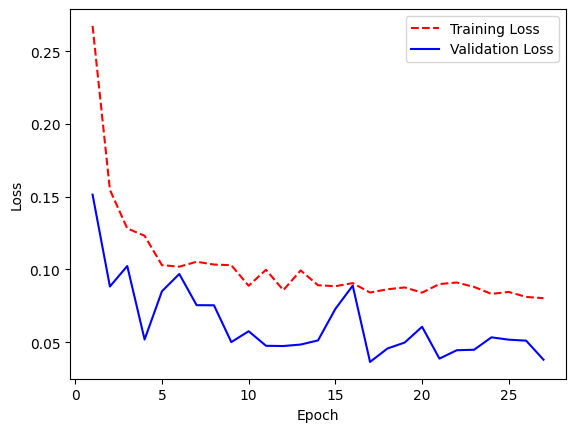

In [ ]:
training_loss = history5.history['loss']
val_loss = history5.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Pada awalnya, dalam membuat modified model, saya berencana untuk handle imbalance class dengan menambahkan class weight (pada Ver 1). Namun, ternyata hal tersebut malah membuat performa model saya menurun. Selain itu, saya juga menambahkan Dropout. Hal tersebut dikarenakan, dalam beberapa kali pertama saya run model baseline, terdapat perbedaan besar antara grafik val dan train loss. Oleh karena itu saya suspect akan adanya overfitting meskipun akurasinya baik-baik saja. Selain itu, dropout juga saya tujukan sebagai "ensemble" untuk model tersebut karena model akan jadi lebih terbiasa dengan data yang bervariasi tiap layernya dengan harapan akan menaikkan performa model baseline dan lebih robust terhadap input data yang bervariasi. Saya juga mengubah activation function hidden layer dari ReLU menjadi LeakyReLu. Hal ini dikarenakan Leaky ReLU digunakan untuk mengatasi masalah "dying ReLU" dengan mengizinkan gradien kecil yang bukan nol untuk masukan negatif, sehingga memastikan neuron dapat terus belajar.

Pada Ver 3 dan 4 saya fokuskan untuk mengubah jumlah neuron dan activation function untuk output layer. Yang mana dapat dilihat bahwa keduanya memiliki performa yang jauh lebih rendah dibandingkan base modelnya sendiri. Terlebih, dapat dilihat bahwa grafik train val lossnya terus naik, yang menandakan adanya overfitting.

Dalam Ver 2, saya menggunakan arsitektur yang sama dengan Ver 1. Bedanya, pada Var 2 saya tidak menambahkan class weight. Hal tersebut ternyata membuat performa model modified Var 1 meningkat.

Dalam percobaan terakhir saya, saya membuat model untuk handle semua percobaan saya di atas dengan menggabungkan artitektur, parameter, dan fine tuning yang membuat model tersebut cukup "baik" dan membuang yang membuat performa model tersebut menurun. Oleh karena itu, untuk jumlah layer, activation function dan jumlah neuron pada tiap layer saya tetap mengikuti arsitektur pada base model karena sepertinya arsitektur tersebut sudah cocok dengan data yang ada. Saya juga menambahkan dropout pada tiap hidden layer karena performa pada model 2 yang lebih baik dengan adanya dropout pada tiap hidden layer. Terakhir, saya menggunakan batch normalization dengan tujuan untuk menaikkan convergence dari train val loss karena propagasi gradien yang lebih stabil. Dengan melakukan hal-hal tersebut, saya dapat menghasilkan model yang lebih optimal dibandingkan dengan model baseline.







# f) Evaluation

[LO 3, LO 4, 5 poin] Lakukan evaluasi unjuk kerja kedua arsitektur di atas pada test set dengan
mencari nilai accuracy, precision, recall dan F1-Score. Dan berikan penjelasan mengenai hasilnya
dengan rinci.

Disini saya hanya menggunakan hasil prediksi dari model yang paling optimal antara 1D (model dengan scaled data) dan 1E (model modified versi 5)

## Baseline

In [ ]:
baseline_y_pred = np.argmax(baseline_predictions_scaled, axis=1)
baseline_y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
loss, accuracy, auc = baseline.evaluate(x_test_scaled, y_test_encoded)
print("Test Loss:", loss, "Test Accuracy:", accuracy, "Test AUC:", auc)

16/16 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9700 - auc: 0.9976
Test Loss: 0.062455352395772934 Test Accuracy: 0.9700000286102295 Test AUC: 0.9975879192352295


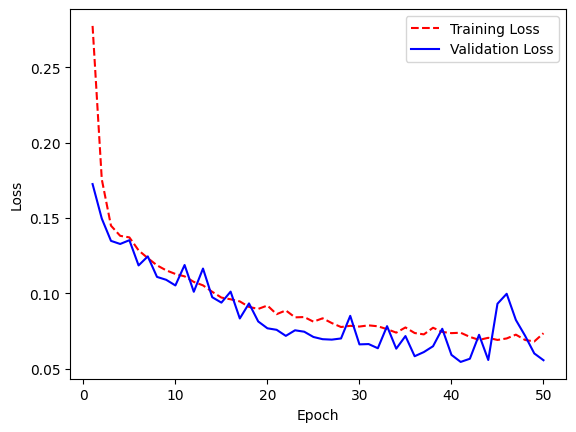

In [ ]:
training_loss = history_scaled.history['loss']
val_loss = history_scaled.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, classification_report

auc_score = roc_auc_score(y_test, baseline_y_pred)
precision = precision_score(y_test, baseline_y_pred)
recall = recall_score(y_test, baseline_y_pred)
f1 = f1_score(y_test, baseline_y_pred)
accuracy = accuracy_score(y_test, baseline_y_pred)


print("AUC Score:", auc_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy", accuracy)
print()

print(classification_report(y_test, baseline_y_pred))

AUC Score: 0.9015113806054573
Precision: 0.8695652173913043
Recall: 0.8163265306122449
F1-score: 0.8421052631578948
Accuracy 0.98

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       451
           1       0.87      0.82      0.84        49

    accuracy                           0.97       500
   macro avg       0.92      0.90      0.91       500
weighted avg       0.97      0.97      0.97       500



## Modified

In [ ]:
modified_y_pred = np.argmax(modified_pred5, axis=1)
modified_y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
loss, accuracy, auc = modified5.evaluate(x_test_scaled, y_test_encoded)
print("Test Loss:", loss, "Test Accuracy:", accuracy, "Test AUC:", auc)

16/16 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9800 - auc_4: 0.9962
Test Loss: 0.06030973792076111 Test Accuracy: 0.9800000190734863 Test AUC: 0.9962040185928345


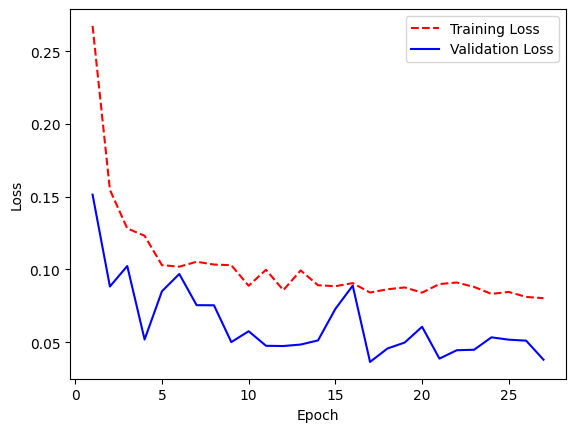

In [ ]:
training_loss = history5.history['loss']
val_loss = history5.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, classification_report, accuracy_score

auc_score = roc_auc_score(y_test, modified_y_pred)
precision = precision_score(y_test, modified_y_pred)
recall = recall_score(y_test, modified_y_pred)
f1 = f1_score(y_test, modified_y_pred)
accuracy = accuracy_score(y_test, modified_y_pred)

print("AUC Score:", auc_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy", accuracy)
print()

print(classification_report(y_test, modified_y_pred))

AUC Score: 0.9070546178560116
Precision: 0.975609756097561
Recall: 0.8163265306122449
F1-score: 0.888888888888889
Accuracy 0.98

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       451
           1       0.98      0.82      0.89        49

    accuracy                           0.98       500
   macro avg       0.98      0.91      0.94       500
weighted avg       0.98      0.98      0.98       500



Kedua model baseline dan modified performanya hampir sama hanya ada perbedaan kecil antara keduanya, sangat kecil sehingga perbedaannya hanya berupa beberapa angka dibelakang koma.

Untuk AUC score sendiri, mengukur kemampuan model dalam membedakan individu yang memenuhi syarat dan tidak memenuhi syarat. Sehingga, skor AUC yang tinggi akan menunjukkan performa model yang lebih baik. Dari hasil yang diketahui bahwa AUC score dari modified model sedikit lebih tinggi dibandingkan baseline model yaitu masing-masing sebesar 0.9070546178560116 dan 0.9015113806054573.

Precision mengukur proporsi kasus positif yang diprediksi dengan tepat (yaitu, individu yang memenuhi syarat yang teridentifikasi dengan benar) dari semua kasus positif yang diprediksi. Dalam konteks personal loan, ketelitian yang tinggi penting untuk memastikan bahwa individu yang diprediksi memenuhi syarat untuk mendapatkan pinjaman memang memenuhi syarat. Dari hasil yang didapat, dapat diketahui bahwa modified model(0.975609756097561) memiliki precision yang jauh lebih tinggi dibandingkan baseline model(0.8695652173913043).

Dalam hal accuracy yang mengukur ketepatan perdiksi in general, kedua model memiliki akurasi yang sama yaitu 0.98. Namun, skor akurasi ini kurang cocok sebagai metric untuk kasus data yang imbalance seperti personal loan ini karena dapat terjadi misleading. Dalam kasus data imbalance, accuracy dapat memberikan kesan seolah-olah model perform dengan baik, namun kenyataannya, bisa saja model hanya spam 1 kelas yang mayoritas. Sehingga, nilai akurasinya menjadi tinggi, while, in reality, model tidak bisa memprediksi kelas yang minoritas.

Recall sendiri mengukur proporsi true positive yang diidentifikasi dengan benar. Sedangkan, F1 score sendiri adalah gabungan dari precision dan recall. Jika suatu model memiliki F1 score yang tinggi, dapat disimpulkan bahwa model tersebut dapat memprediksi true positive (orang yang qualified untuk personal loan) dengan benar while, minimizing false positive (yang harusnya ga qualified tapi di predict sebagai qualified). Model baseline memiliki recall dan F1 score secara berturut-turut 0.8163265306122449 dan 0.8421052631578948. Sedangkan, modified model memiliki recall dan F1 score secara berturut-turut 0.8163265306122449 dan 0.888888888888889.

Dari semua metric diatas, dapat disimpulkan bahwa model modified merupakan predictor yang sedikit lebih baik dibandingkan dengan baseline model.